In [2]:
!pip install quandl

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import quandl

#Import Model Packages 
from sklearn.decomposition import PCA

In [4]:
quandl.ApiConfig.api_key = 'hUNEytJdLshWyvz7D7Yg'


In [5]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [18]:
treasury_df

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.18,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
2022-04-05,0.18,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
2022-04-06,0.21,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63


In [19]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
dataset=treasury_df

In [22]:
set_option("display.width",100)
dataset.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2022-04-04,0.18,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
2022-04-05,0.18,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
2022-04-06,0.21,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63
2022-04-07,0.21,0.68,1.15,1.78,2.47,2.66,2.70,2.73,2.66,2.87,2.69
2022-04-08,0.20,0.70,1.19,1.81,2.53,2.73,2.76,2.79,2.72,2.94,2.76


In [11]:
set_option("precision",3)
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5176.000,10152.00,10152.000,15054.000,11462.000,15054.000,15054.000,13184.000,15054.000,13365.000,11284.000
mean,1.175,3.77,3.951,4.917,5.036,5.330,5.594,5.951,5.933,5.963,6.332
std,1.450,3.25,3.365,3.456,3.810,3.338,3.203,3.266,2.992,2.907,3.052
min,0.000,0.00,0.020,0.040,0.090,0.100,0.190,0.360,0.520,0.870,0.990
25%,0.060,0.49,0.650,2.120,1.530,2.630,3.120,3.110,3.920,4.060,3.910
50%,0.440,3.55,3.725,4.990,4.885,5.380,5.545,6.100,5.730,5.490,5.820
75%,1.780,5.78,6.020,6.890,7.510,7.320,7.540,7.890,7.680,7.470,8.280
max,5.270,17.01,17.430,17.310,16.950,16.590,16.270,16.050,15.840,15.780,15.210


3.2 Data Visualization

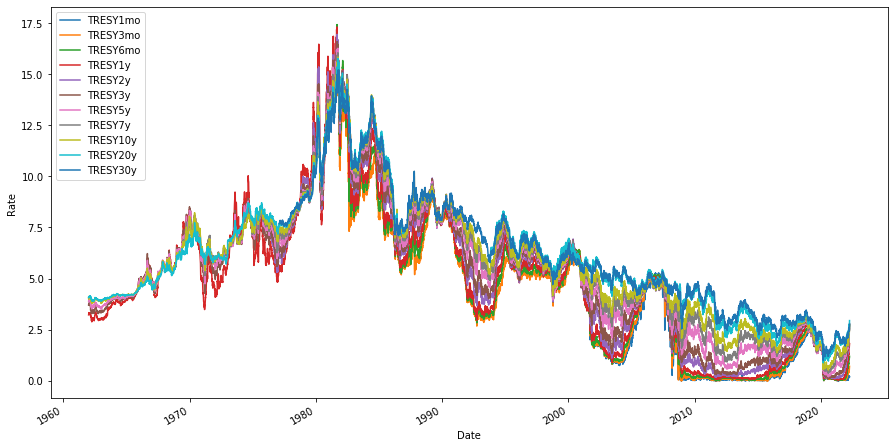

In [25]:
dataset.plot(figsize=(15,8))
plt.ylabel("Rate")
plt.legend(loc=2)
plt.show()


In [23]:
dataset.isna().sum()

TRESY1mo    9878
TRESY3mo    4902
TRESY6mo    4902
TRESY1y        0
TRESY2y     3592
TRESY3y        0
TRESY5y        0
TRESY7y     1870
TRESY10y       0
TRESY20y    1689
TRESY30y    3770
dtype: int64

In [26]:
correlation= dataset.corr()

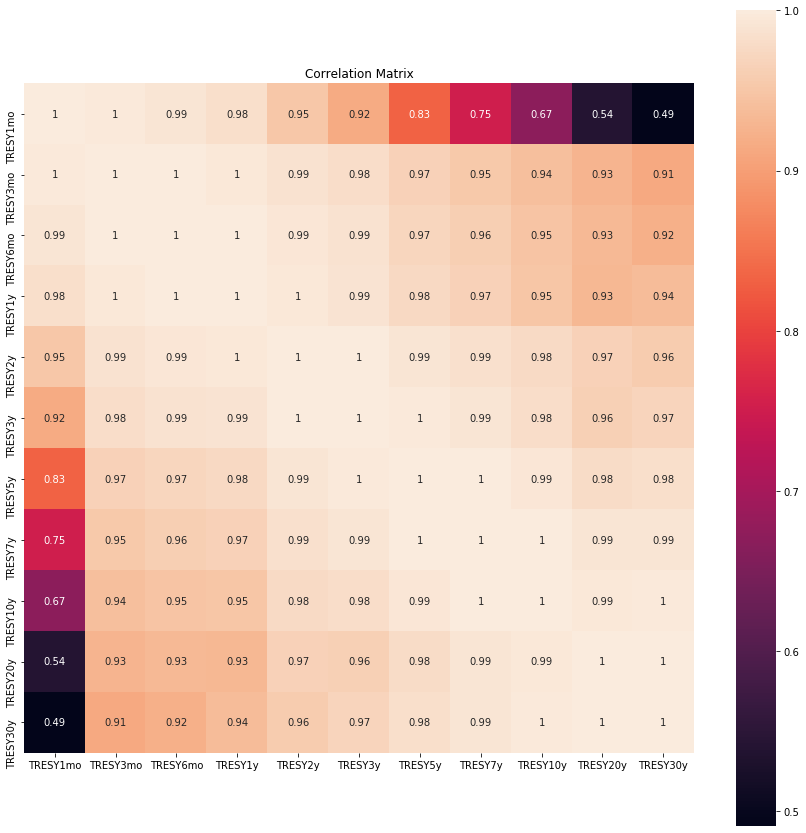

In [30]:
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix")
sns.heatmap(correlation,vmax=1,square=True,annot=True)

In [32]:
dataset = dataset.fillna(method="ffill")

In [33]:
dataset = dataset.dropna(axis=0)

In [34]:
dataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53


4.2 Data Transformation

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns= dataset.columns,index=dataset.index)


In [41]:
rescaledDataset.shape

(5176, 11)

In [42]:
rescaledDataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03,5.176e+03
mean,1.804e-15,1.744e-15,2.303e-15,-1.002e-15,5.455e-16,-1.442e-14,1.401e-15,-1.268e-15,7.228e-16,-6.193e-16,-1.656e-15
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-8.104e-01,-8.348e-01,-8.748e-01,-9.501e-01,-1.124e+00,-1.326e+00,-1.682e+00,-1.909e+00,-2.088e+00,-2.172e+00,-2.365e+00
25%,-7.690e-01,-7.804e-01,-7.949e-01,-8.415e-01,-8.332e-01,-7.745e-01,-7.467e-01,-7.844e-01,-8.263e-01,-7.981e-01,-7.362e-01
50%,-5.069e-01,-4.747e-01,-3.357e-01,-2.854e-01,-2.871e-01,-2.815e-01,-2.480e-01,-1.979e-01,-1.496e-01,-1.473e-01,-6.578e-02
75%,4.173e-01,4.289e-01,4.429e-01,5.420e-01,6.207e-01,6.235e-01,7.104e-01,8.286e-01,9.030e-01,9.372e-01,8.659e-01
max,2.824e+00,2.691e+00,2.659e+00,2.617e+00,2.564e+00,2.470e+00,2.245e+00,2.108e+00,2.022e+00,1.990e+00,1.928e+00


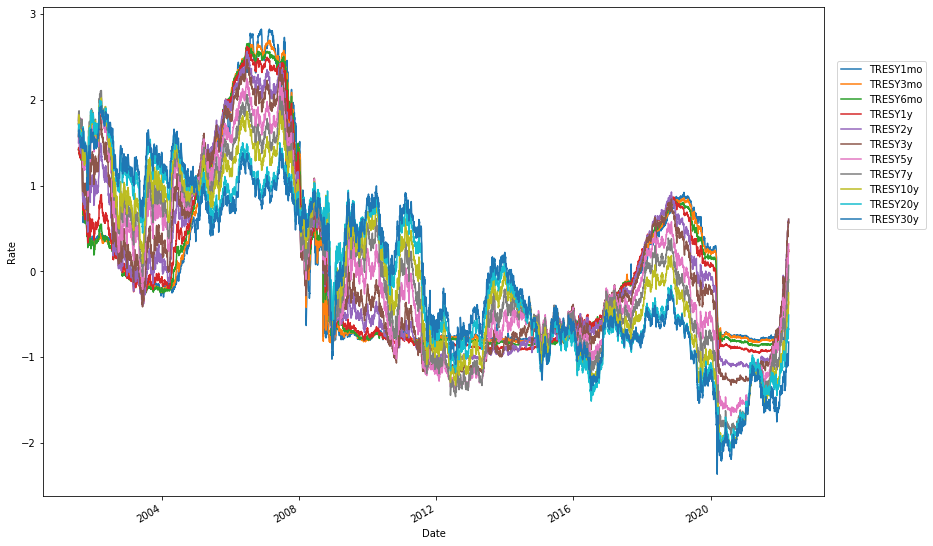

In [43]:
rescaledDataset.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

5. Evaluate Algorithms and Models

5.2. Model Evaluation- Applying Principle Component Analysis

In [45]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

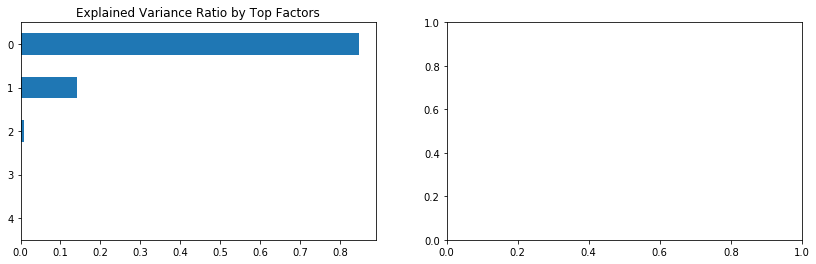

In [47]:
NumEigenvalues=5
fig,axes = plt.subplots(ncols=2,figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);

5.2.2. Intuition Behind the Principal Components

In [49]:
def PCWeights():
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i]/sum(pca.components_[i])
    weights = weights.values.T 
    return weights
weights=PCWeights()

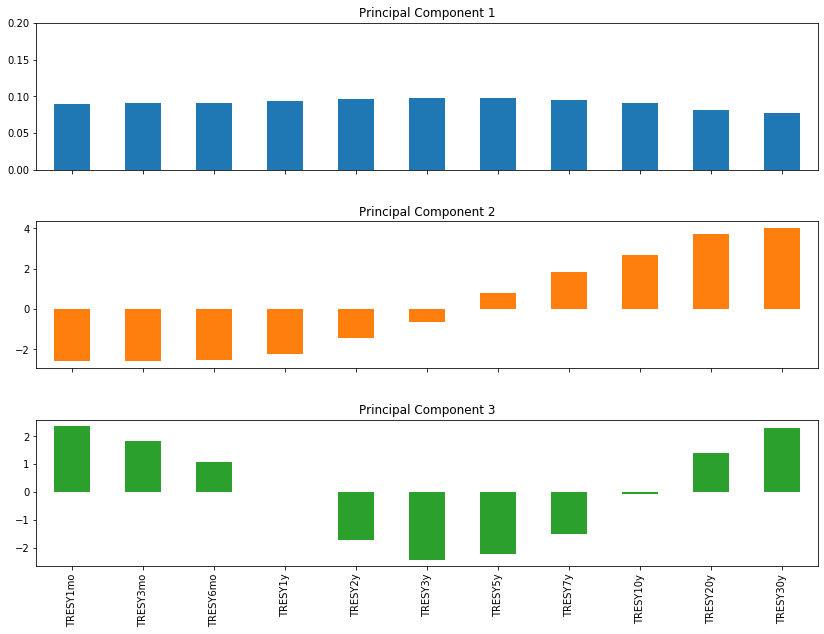

In [50]:
weights = PCWeights()
NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

In [ ]:
pca.transform